In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [ ]:
# Loading the dataset
df= pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Data Preprocessing and Model Training
X= df.drop('target', axis=1)
y= df['target']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)
# Scaling the features
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
# Decision Tree Classifier
model1= DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)
y_pred1= model1.predict(X_test)
print(classification_report(y_test, y_pred1))
print("Test Accuracy:", accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

Test Accuracy: 0.9707792207792207


Here it's easily observable that without nay parameters like "max depth" we come with a overall accuracy of 97% but class 1 precision and class 0 recall has 1.00 which means the data is overfitted.

In [22]:
model2= DecisionTreeClassifier(random_state=42, max_depth=6)
model2.fit(X_train, y_train)
y_pred2= model2.predict(X_test)
print(classification_report(y_test, y_pred2))
print("Test Accuracy:", accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.84      0.88       159
           1       0.84      0.94      0.89       149

    accuracy                           0.89       308
   macro avg       0.89      0.89      0.89       308
weighted avg       0.89      0.89      0.89       308

Test Accuracy: 0.8863636363636364


After adding parameters like "max depth" we got an accuracy of 88% it is low than the previous one but we can observe that there is no overfitting in any of the class.

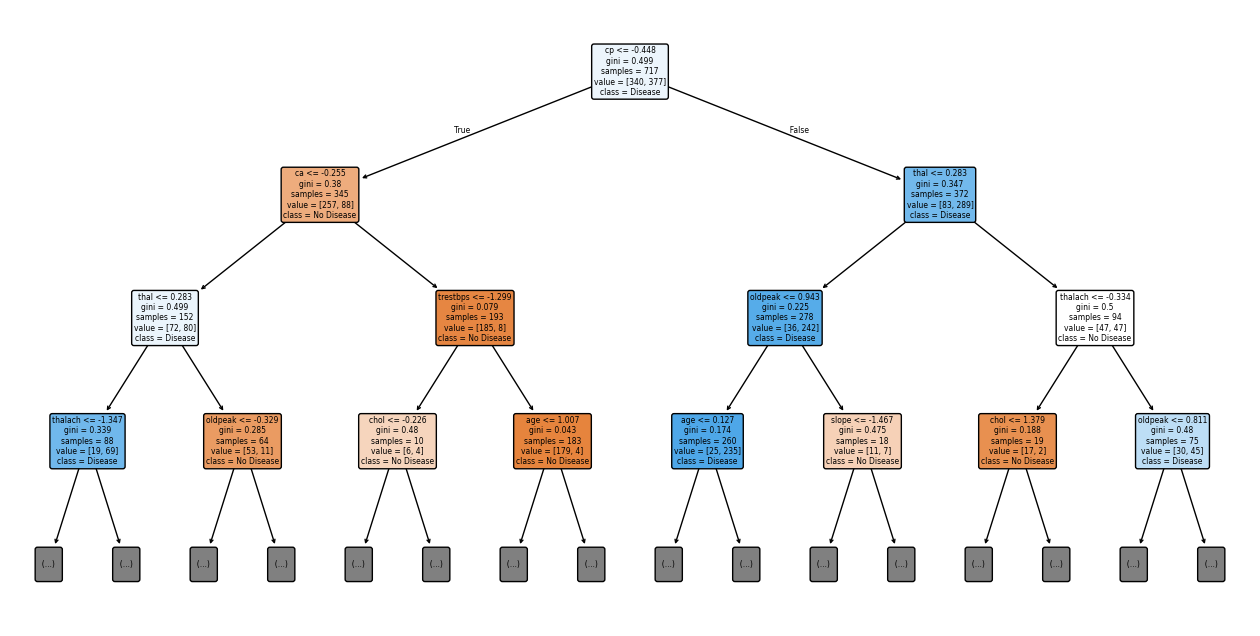

In [ ]:
# Plot tree for model1
plt.figure(figsize=(16, 8))
plot_tree(model1, 
          filled=True, 
          feature_names=X.columns, 
          class_names=["No Disease", "Disease"], 
          rounded=True,
          max_depth=3)
plt.show()

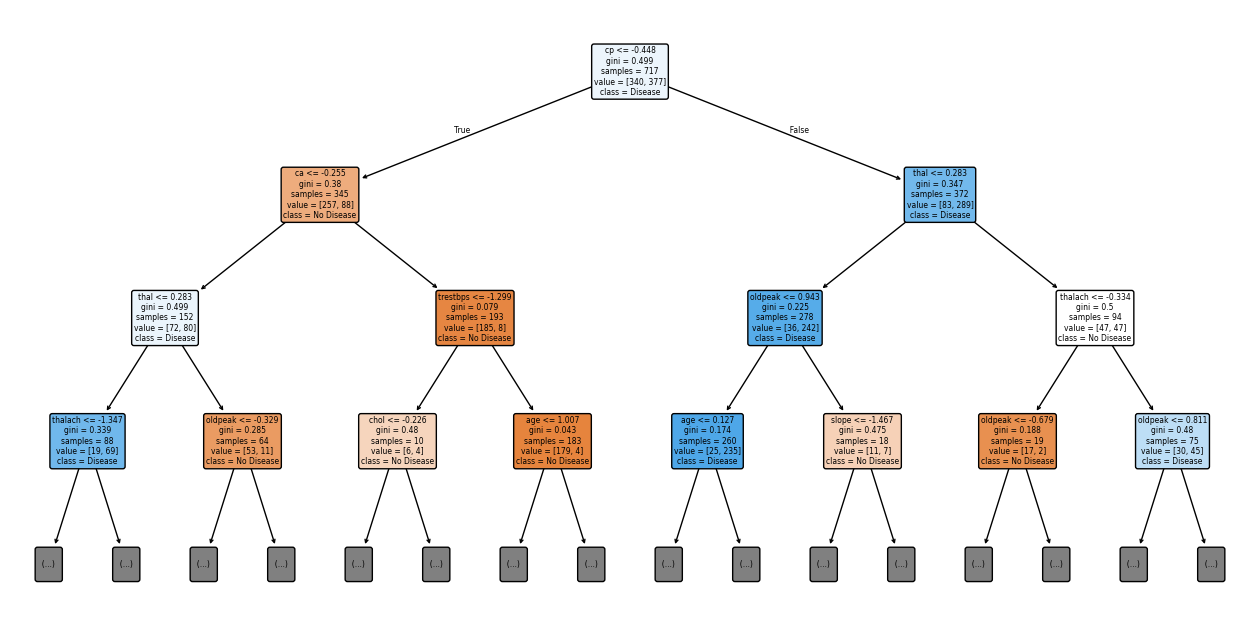

In [ ]:
# Plot tree of model2
plt.figure(figsize=(16, 8))
plot_tree(model2, 
          filled=True, 
          feature_names=X.columns, 
          class_names=["No Disease", "Disease"], 
          rounded=True,
          max_depth=3)
plt.show()

In [ ]:
# Random Forest Classifier
model3= RandomForestClassifier(random_state=42)
model3.fit(X_train, y_train)
y_pred3= model3.predict(X_test)
print(classification_report(y_test, y_pred3))
print("Test Accuracy:", accuracy_score(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       159
           1       1.00      0.96      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Test Accuracy: 0.9805194805194806


Similar to the Decision tree classifier, in Random forest classifer we get 98%  of accuracy without any parameters and we can see that there's is overfitting here as well.

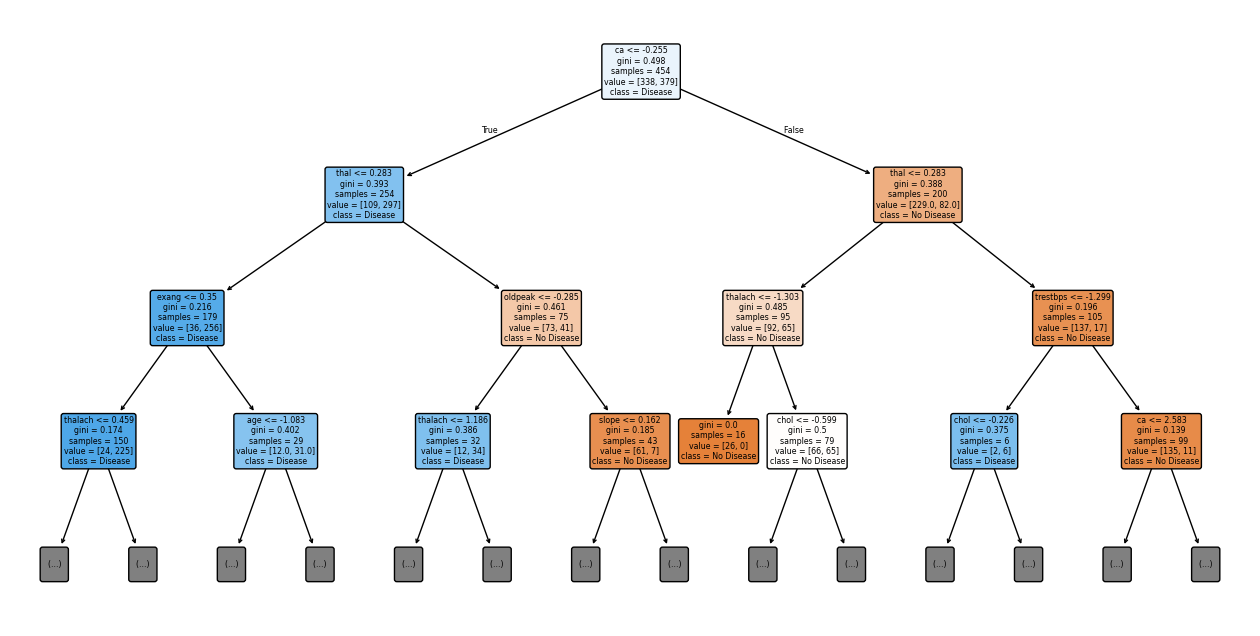

In [ ]:
# Plot tree for model3
estimator = model3.estimators_[0]
plt.figure(figsize=(16,8))
plot_tree(estimator, 
          feature_names=X.columns, 
          class_names=["No Disease","Disease"], 
          filled=True, rounded=True,
          max_depth=3)   
plt.show()

In [ ]:
model4= RandomForestClassifier(random_state=42,n_estimators=100, max_depth=3)
model4.fit(X_train, y_train)
y_pred4= model4.predict(X_test)
print(classification_report(y_test, y_pred4))
print("Test Accuracy:", accuracy_score(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       159
           1       0.79      0.93      0.85       149

    accuracy                           0.84       308
   macro avg       0.85      0.85      0.84       308
weighted avg       0.86      0.84      0.84       308

Test Accuracy: 0.8441558441558441


Here we can see that after using parameters like "n_estimatore and max depth" we get less accuracy compared to the last model but there's no overfitting which improves accuracy in the test data.

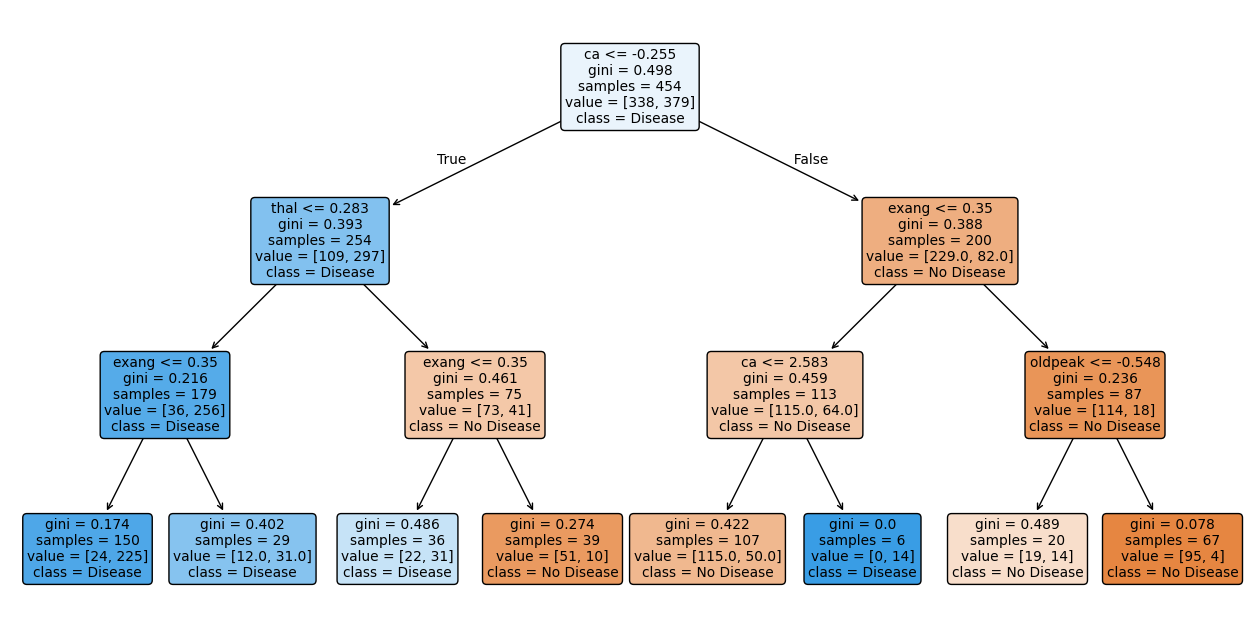

In [ ]:
# Plot tree for model4
estimator = model4.estimators_[0]
plt.figure(figsize=(16,8))
plot_tree(estimator, 
          feature_names=X.columns, 
          class_names=["No Disease","Disease"], 
          filled=True, rounded=True,
          max_depth=3)   
plt.show()

In [ ]:
# Featue importance for Random Forest Classifier
Importance= model4.feature_importances_
features_importances1 = pd.Series(Importance, index=X.columns).sort_values(ascending=False)
features_importances1

cp          0.200552
thal        0.172590
ca          0.150440
oldpeak     0.135635
thalach     0.117816
exang       0.067576
slope       0.052477
age         0.042892
sex         0.023844
chol        0.015805
trestbps    0.013280
restecg     0.006036
fbs         0.001058
dtype: float64

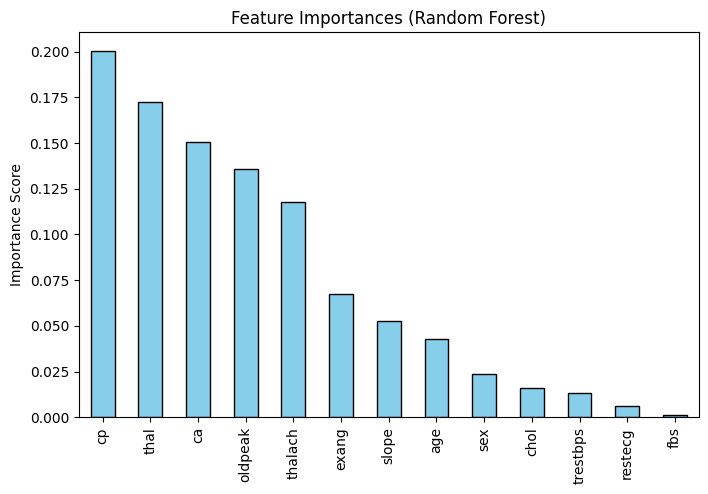

In [ ]:
# Plotting feature importances
plt.figure(figsize=(8,5))
features_importances1.plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# Feature Importance fo r Decision Tree Classifier
Importance= model2.feature_importances_
features_importances2 = pd.Series(Importance, index=X.columns).sort_values(ascending=False)
features_importances2

cp          0.319014
thal        0.170398
ca          0.130848
oldpeak     0.094394
chol        0.068852
thalach     0.063622
slope       0.051539
age         0.048558
trestbps    0.034093
exang       0.018682
sex         0.000000
fbs         0.000000
restecg     0.000000
dtype: float64

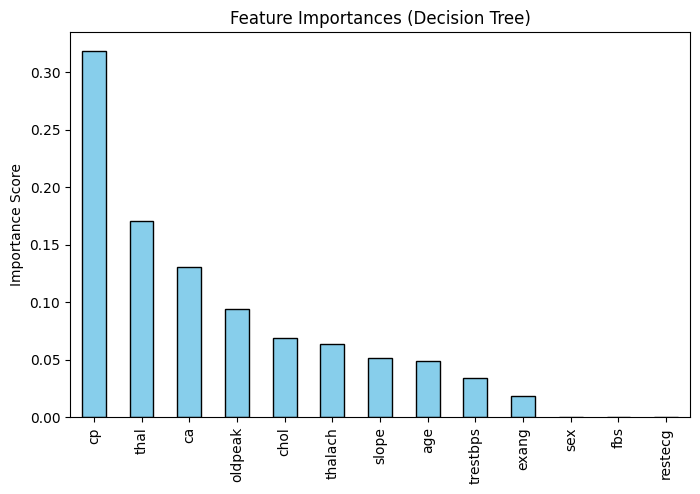

In [ ]:
# Plotting feature importances
plt.figure(figsize=(8,5))
features_importances2.plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Feature Importances (Decision Tree)")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# Cross-validation for Random Forest Classifier
cv_scores = cross_val_score(model4, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.91219512 0.85853659 0.91707317 0.83902439 0.8195122 ]
Mean CV Accuracy: 0.8692682926829269


In [ ]:
# Cross-validation for Decision Tree Classifier
cv_scores = cross_val_score(model2, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.96585366 0.96097561 0.94146341 0.91707317 0.96585366]
Mean CV Accuracy: 0.9502439024390243


After using cross validation we get to know that for this dataset(Heart disease) Decision tree classifier works better than Random forest classifiers.